## Dataset Analysis

### Questions TOC

- [Q1](#z)
- [Q2](#a)
- [Q3](#b)
- [Q4](#c)
- [Q5](#d)
- [Q6](#e)
- [Q7](#f)
- [Q8](#g)
- [Q9](#h)
- [Q10](#k)
- [Q11](#h)
- [Q12](#j)
- [Q13](#l)
- [Q14](#p)
- [Q15](#o)

<a id="z" ></a>

### 1. Loading the relevant libraries and dataset

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 100)
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')
#plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-pastel')

In [64]:
df = pd.read_excel('Zomato_Cleaned.xlsx')

In [65]:
df.head()

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
0,14221,Shree Ranga Vilas,No,No,3.2,7,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,Dine-out,Electronic City
1,43422,Sphyre - Gateway Hotel,No,No,3.6,45,Residency Road,Lounge,NaN,Finger Food,1700,Dine-out,MG Road
2,16032,Popular Bakery,No,No,3.7,36,HSR,"Dessert Parlor, Bakery",NaN,"Bakery, Desserts",600,Delivery,HSR
3,51635,Thai & Chinese Fast Food,No,No,3.4,7,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,Dine-out,Whitefield
4,23424,Grill On Wheels,No,No,NEW,0,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,Dine-out,JP Nagar


<a id="a" ></a>

### 2. Which are the top restaurant chains based on the distribution(frequency) in Bengaluru?

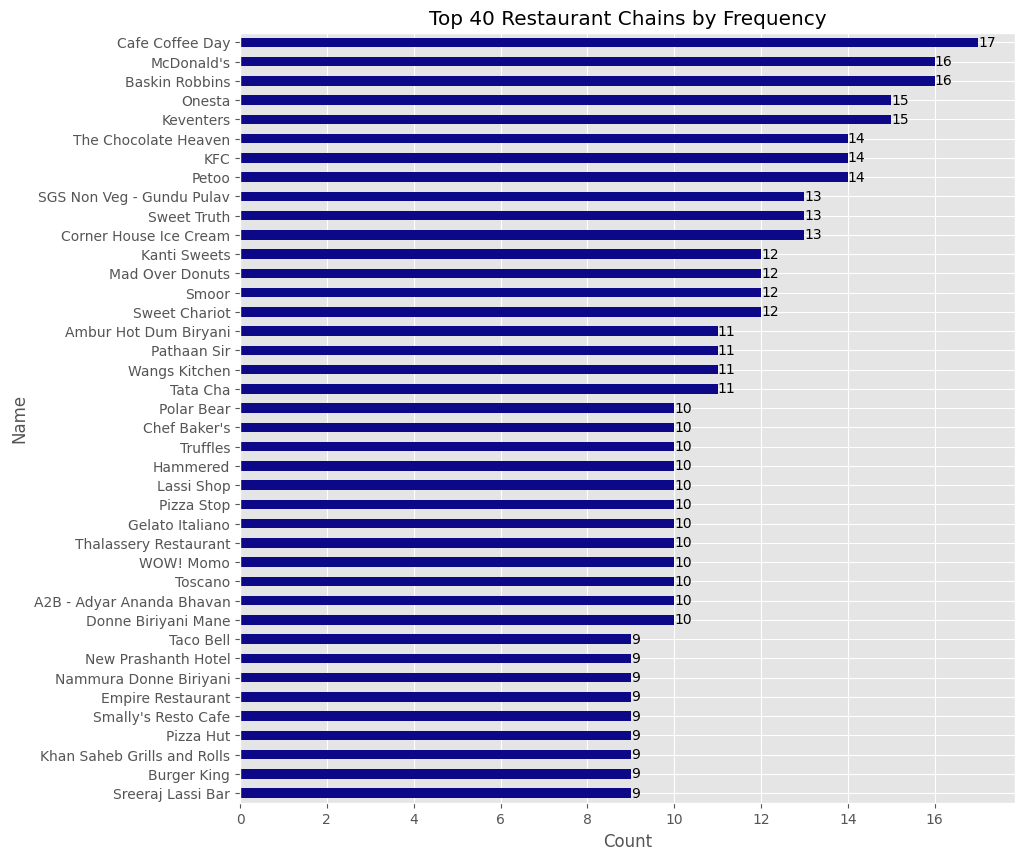

In [66]:
df['Name'].value_counts().head(40).sort_values().plot(kind = 'barh', 
title='Top 40 Restaurant Chains by Frequency', figsize=(10,10),colormap='plasma')
for i, v in enumerate(df['Name'].value_counts().head(40)):
    plt.text(v, 39-i, str(v), va='center', fontsize=10, color='black')

plt.xlabel('Count')
plt.show()

#### CCD has more number of branches in the city, further substantiating the claim that Bengaluru was coffee capital of India up until recent. (Now Coorg (situated in Karnataka) is coffee capital of India)

---

<a id="b" ></a>

### 3. How many restaurants do not accept online orders?

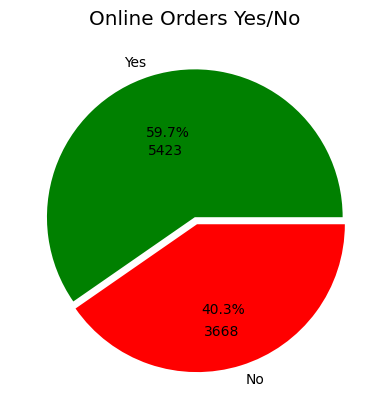

In [67]:
plt.pie(df['Online_Order'].value_counts(), labels=['Yes','No'], autopct='%.1f%%', explode=[0,0.05], colors=['g','r'])
plt.title('Online Orders Yes/No')
plt.text(-0.32,0.43,str(df['Online_Order'].value_counts()[0]))
plt.text(0.062,-0.8,str(df['Online_Order'].value_counts()[1]))
plt.show()

#### Nearly 40% of restaurants in the city don't accept online orders. 

---

<a id="c" ></a>

### 4. What is the ratio b/w restaurants that provide and do not provide table booking?

#### Ratio between restaurants which provide and don't provide Table booking is 1124:7967 which is around 0.14

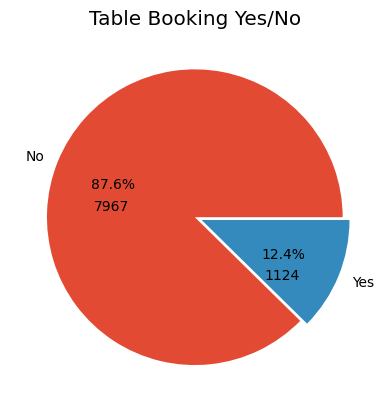

In [68]:
plt.pie(df['Book_Table'].value_counts(), labels=['No','Yes'], autopct='%.1f%%', explode=[0,0.05])
plt.title('Table Booking Yes/No')
plt.text(-0.68,0.05,str(df['Book_Table'].value_counts()[0]))
plt.text(0.47,-0.42,str(df['Book_Table'].value_counts()[1]))
plt.show()

---

<a id="d" ></a>

### 5. Use a boxplot on the rating column. Use User Defined Function or Lambda function or Apply function to extract the data that comes before /. Kindly exclude /.

In [69]:
df['Rating (out of 5)'].unique()

array(['3.2', '3.6', '3.7', '3.4', 'NEW', '4.2', -1, '3.5', '4.1', '4.3',
       '4.5', '3.0', '3.9', '4.0', '2.9', '4.4', '3.8', '3.3', '4.7',
       '3.1', '2.5', '4.6', '2.6', '2.7', '2.8', '4.8', '4.9', '2.2',
       '2.3', '2.4', '2.1'], dtype=object)

#### Excluding the ones which have rating as 'NEW' and '-1',

In [70]:
d1 = df.query('`Rating (out of 5)` != "NEW" and `Rating (out of 5)` != -1')
d1.head()

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
0,14221,Shree Ranga Vilas,No,No,3.2,7,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,Dine-out,Electronic City
1,43422,Sphyre - Gateway Hotel,No,No,3.6,45,Residency Road,Lounge,NaN,Finger Food,1700,Dine-out,MG Road
2,16032,Popular Bakery,No,No,3.7,36,HSR,"Dessert Parlor, Bakery",NaN,"Bakery, Desserts",600,Delivery,HSR
3,51635,Thai & Chinese Fast Food,No,No,3.4,7,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,Dine-out,Whitefield
5,15103,Patisserie Nitash,No,No,4.2,142,Frazer Town,Bakery,"Patisserie Nitash, Brownie, Chocolate Cake, Ch...",Bakery,500,Delivery,Frazer Town


In [71]:
d1['Rating (out of 5)'] = d1['Rating (out of 5)'].astype('float64')

#### Creating a user-defined function to calculate upper and lower whiskers of a numeric column.

In [72]:
def detect_outlier(col):
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_whisker = Q1-(1.5*IQR)
    upper_whisker = Q3+(1.5*IQR)
    return lower_whisker,upper_whisker

lr,ur = detect_outlier(d1['Rating (out of 5)'])

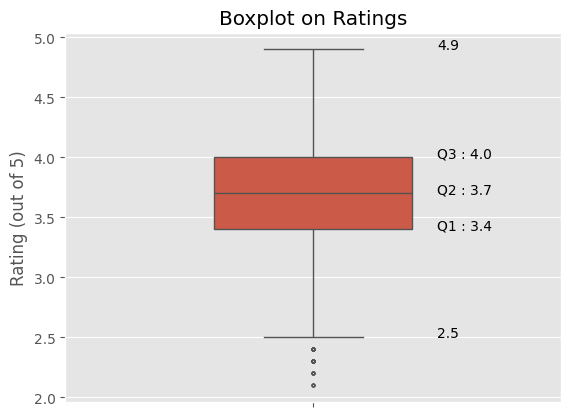

In [73]:
sns.boxplot(data=d1['Rating (out of 5)'], fliersize = 2, width=0.4)

plt.title('Boxplot on Ratings')
plt.text(0.25,d1['Rating (out of 5)'].median(),f"Q2 : {d1['Rating (out of 5)'].median()}")
plt.text(0.25,d1['Rating (out of 5)'].quantile(0.25),f"Q1 : {d1['Rating (out of 5)'].quantile(0.25)}")
plt.text(0.25,d1['Rating (out of 5)'].quantile(0.75),f"Q3 : {d1['Rating (out of 5)'].quantile(0.75)}")
plt.text(0.25,lr,f"{lr}")
plt.text(0.25,ur,f"{ur}")

plt.show()

In [74]:
# Checking outlier records
d1[d1['Rating (out of 5)'] < 2.5].head()

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
1122,12120,Mamma Mexicana,Yes,Yes,2.2,406,MG Road,Casual Dining,"Nachos, Pizza, Margarita, Mushroom Soup, Tacos...",Mexican,1000,Delivery,Church Street
1318,26177,Bhagini,Yes,No,2.3,120,Banaswadi,"Casual Dining, Bar",NaN,"Andhra, South Indian, Chinese, North Indian",800,Dine-out,Kammanahalli
2451,7492,Bageecha,Yes,No,2.2,479,Marathahalli,Casual Dining,"Schezwan Chicken, Butter Chicken, Beer, Onion ...","North Indian, Chinese",650,Delivery,Brookefield
2511,47112,Subway,Yes,No,2.4,71,Malleshwaram,"Quick Bites, Food Court","Salad, Sandwich","Healthy Food, Salad, Fast Food",500,Dine-out,Rajajinagar
2708,32359,Biryani Junction,Yes,No,2.3,298,Bommanahalli,Quick Bites,"Raita, Vegetable Biryani, Biryani Combo","Biryani, North Indian, Chinese",450,Delivery,Koramangala 6th Block


#### We can observe few data points less than the lower whisker. I have explored those records and didn't find anything wrong with them. Those restaurants might just be rated low.

---

<a id="e" ></a>

### 6. Online and Offline orders restaurants percentage.

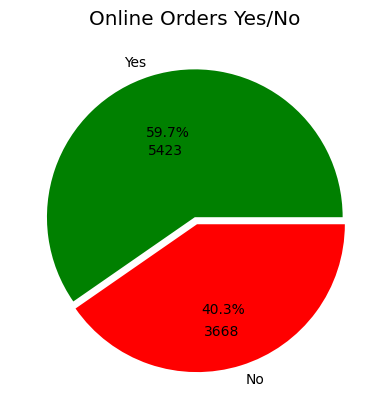

In [75]:
plt.pie(df['Online_Order'].value_counts(), labels=['Yes','No'], autopct='%.1f%%', explode=[0,0.05], colors=['g','r'])
plt.title('Online Orders Yes/No')
plt.text(-0.32,0.43,str(df['Online_Order'].value_counts()[0]))
plt.text(0.062,-0.8,str(df['Online_Order'].value_counts()[1]))
plt.show()

---

<a id="f" ></a>

### 7. Plot the scatter plot using the Cost vs rating variable with respect to online order. Use apply the function Or other function to remove the “,”

In [76]:
d1 = df.query('`Rating (out of 5)` != "NEW" and `Rating (out of 5)` != -1')
d1.head(2)

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
0,14221,Shree Ranga Vilas,No,No,3.2,7,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,Dine-out,Electronic City
1,43422,Sphyre - Gateway Hotel,No,No,3.6,45,Residency Road,Lounge,NaN,Finger Food,1700,Dine-out,MG Road


In [77]:
d1['Rating (out of 5)'] = d1['Rating (out of 5)'].astype('float64')

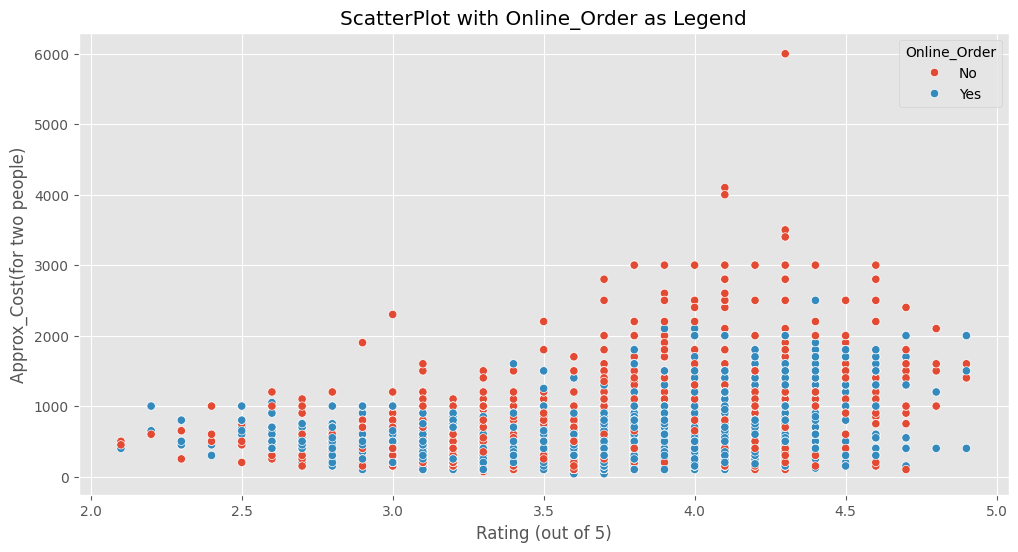

In [78]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
sns.scatterplot(y=d1['Approx_Cost(for two people)'], x=d1['Rating (out of 5)'], hue=d1['Online_Order'], ax=ax)
plt.title('ScatterPlot with Online_Order as Legend')
plt.show()

#### For Online_Order = 'Yes' and 'No' seperately

In [79]:
d2 = d1[d1['Online_Order'] == 'Yes']
d2.head(2)

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
7,35354,Bombay Talkies,Yes,No,3.6,24,Jayanagar,Quick Bites,NaN,"Maharashtrian, Fast Food, Street Food, Sandwich",200,Delivery,Koramangala 7th Block
9,32593,Shagun Sweets & Foods,Yes,No,3.5,221,BTM,"Sweet Shop, Quick Bites","Chaat, Chole Bhature, Raj Kachori, Thali, Rasm...","Mithai, North Indian, Street Food, Chinese",400,Delivery,Koramangala 6th Block


In [80]:
d3 = d1[d1['Online_Order'] == 'No']
d3.head(2)

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
0,14221,Shree Ranga Vilas,No,No,3.2,7,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,Dine-out,Electronic City
1,43422,Sphyre - Gateway Hotel,No,No,3.6,45,Residency Road,Lounge,NaN,Finger Food,1700,Dine-out,MG Road


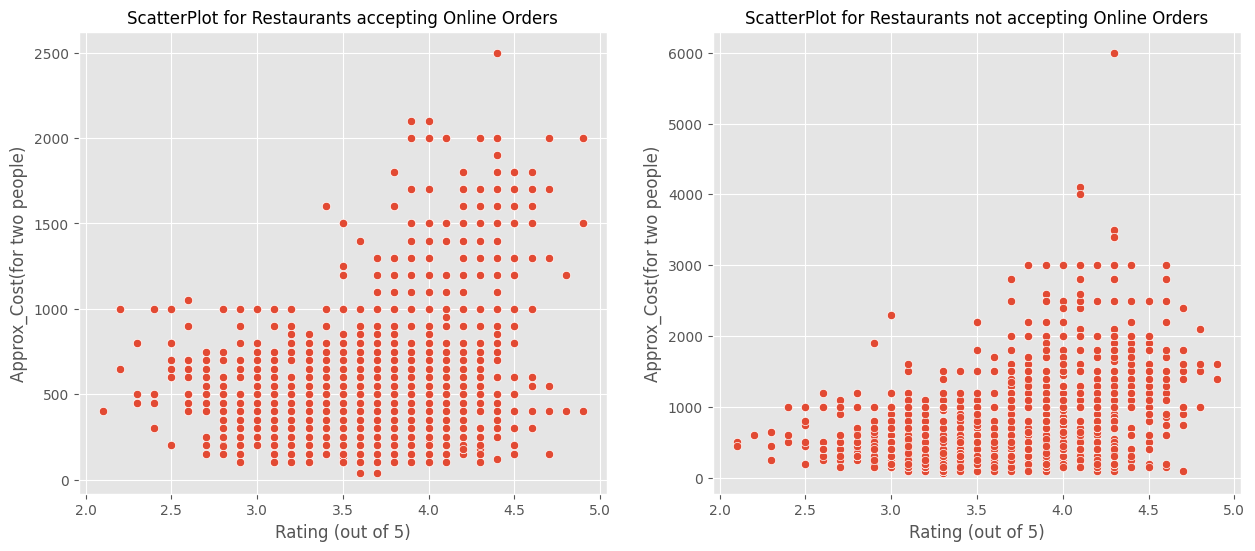

In [81]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.scatterplot(y=d2['Approx_Cost(for two people)'], x=d2['Rating (out of 5)'], ax=ax[0])
sns.scatterplot(y=d3['Approx_Cost(for two people)'], x=d3['Rating (out of 5)'], ax=ax[1])
ax[0].set_title('ScatterPlot for Restaurants accepting Online Orders', fontsize=12)
ax[1].set_title('ScatterPlot for Restaurants not accepting Online Orders', fontsize=12)
plt.show()

#### Observe that for the restaurants which accept online orders, the maximum approximate cost for 2 people is ₹2500 whereas for the restaurants not accepting online orders there are handful of them which cross ₹2500 mark. The highest one (₹6000) is also in 'not-accepting' category. These restaurants are likely to offer a sumptuous in-hotel experience and might deliberately not accept any online orders.  

---

<a id="g" ></a>

### 8. Find the distribution of the votes and Approx_cost using a user-defined function and for a loop.

In [82]:
num_col = []
for i in df.columns:
    if df[i].dtype == 'object':
        continue
    num_col.append(i)

num_col.remove('ID')
num_col

['Number_of_votes', 'Approx_Cost(for two people)']

In [83]:
# User Defined Function for Distribution Plots

def kde(col,title,ax):
    sns.distplot(col, hist=False, kde=True, kde_kws={'fill':True}, color='g', ax=ax)
    ax.set_title(f"Kernel Density Estimation of {title}", fontsize=11)

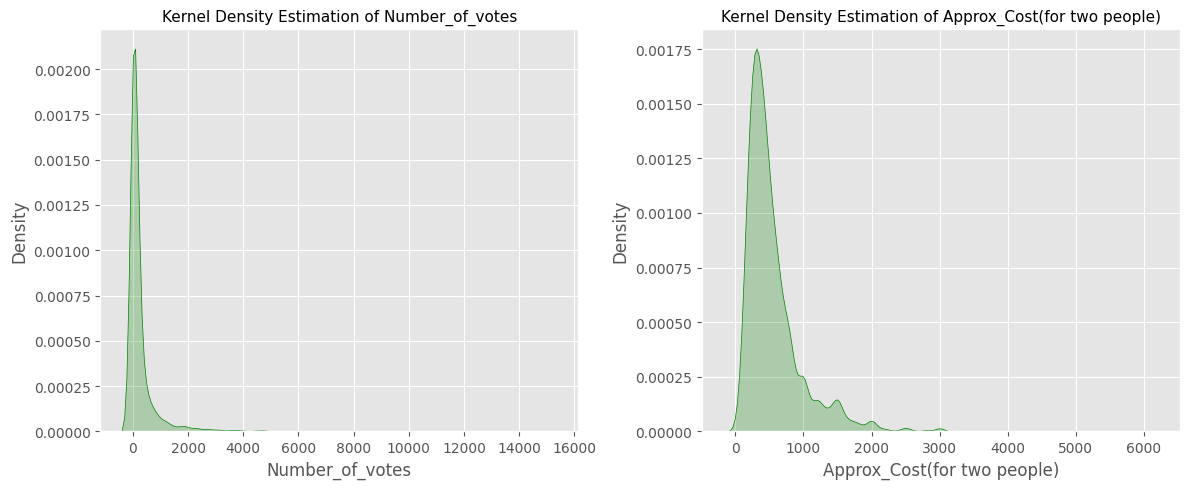

In [84]:
fig,ax = plt.subplots(1,2, figsize=(12,5))
ax = ax.ravel()
for i in range(len(num_col)):
    kde(df[num_col[i]], num_col[i], ax[i])

plt.tight_layout()
plt.show()

#### Both are positively skewed distributions

---

<a id="h" ></a>

### 9&11. Which are the most common restaurant type in Banglore?

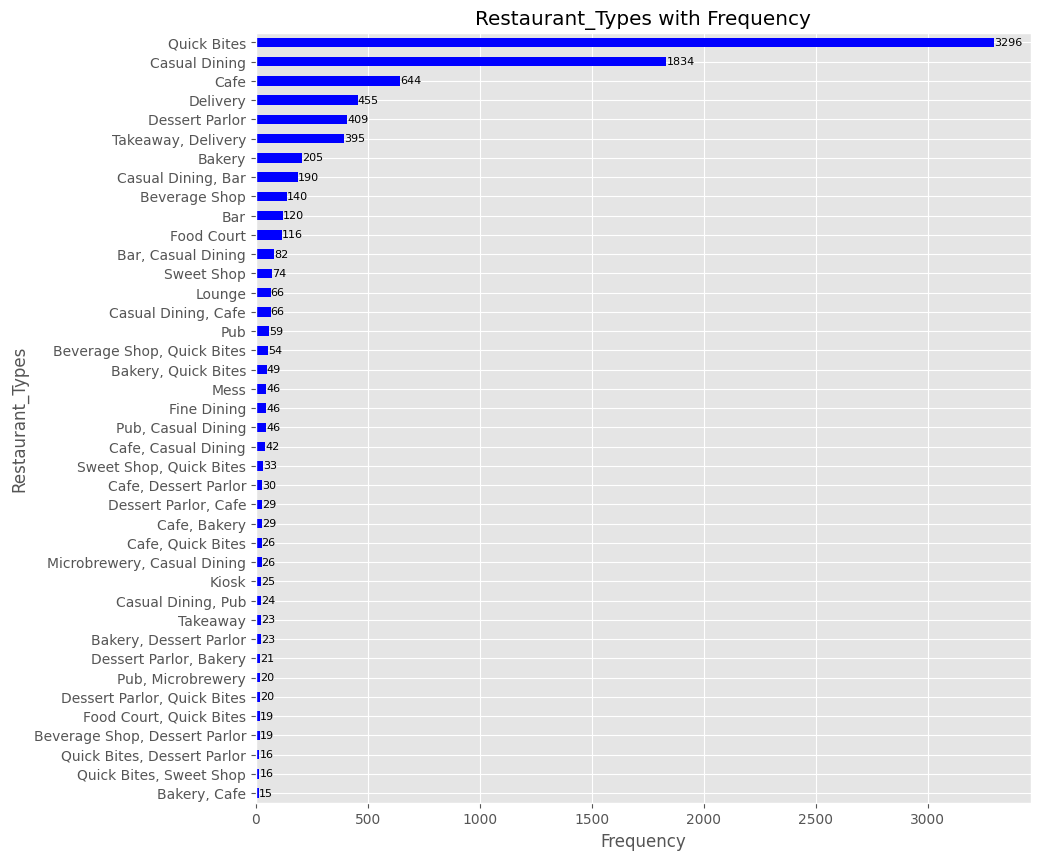

In [85]:
df['Rest_Type'].value_counts().head(40).sort_values().plot(kind='barh',figsize=(10,10), title='Restaurant_Types with Frequency', colormap = 'winter')
for i,v in enumerate(df['Rest_Type'].value_counts().head(40)):
    plt.text(v, 39-i, str(v), va='center', fontsize=8, color='black')

plt.ylabel('Restaurant_Types')
plt.xlabel('Frequency')
plt.show()

#### Clearly, there are some overlaps. I have tried to divide the Rest_Types fom one another

In [86]:
dfn = df.copy()

In [87]:
dfn['Rest_Type'] = dfn['Rest_Type'].str.split(', ')
dfn = dfn.explode('Rest_Type')

In [88]:
dfn

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
0,14221,Shree Ranga Vilas,No,No,3.2,7,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,Dine-out,Electronic City
1,43422,Sphyre - Gateway Hotel,No,No,3.6,45,Residency Road,Lounge,NaN,Finger Food,1700,Dine-out,MG Road
2,16032,Popular Bakery,No,No,3.7,36,HSR,Dessert Parlor,NaN,"Bakery, Desserts",600,Delivery,HSR
2,16032,Popular Bakery,No,No,3.7,36,HSR,Bakery,NaN,"Bakery, Desserts",600,Delivery,HSR
3,51635,Thai & Chinese Fast Food,No,No,3.4,7,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,Dine-out,Whitefield
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9087,7255,Cafe Delight,No,No,3.2,40,Marathahalli,Quick Bites,NaN,"Cafe, Italian",400,Delivery,Brookefield
9088,41541,TBC- Sky Lounge,No,Yes,4.4,619,Marathahalli,Casual Dining,"Fish, Peri Peri Chicken, Cocktails, Chilli Chi...","Continental, Asian, Italian, North Indian",1000,Dine-out,Marathahalli
9088,41541,TBC- Sky Lounge,No,Yes,4.4,619,Marathahalli,Bar,"Fish, Peri Peri Chicken, Cocktails, Chilli Chi...","Continental, Asian, Italian, North Indian",1000,Dine-out,Marathahalli
9089,35621,Tawa Sagara,No,No,3.8,122,Jayanagar,Casual Dining,"Sea Food, Biryani, Fish Thali, Neer Dosa, Murg...","Mangalorean, Seafood",400,Delivery,Koramangala 7th Block


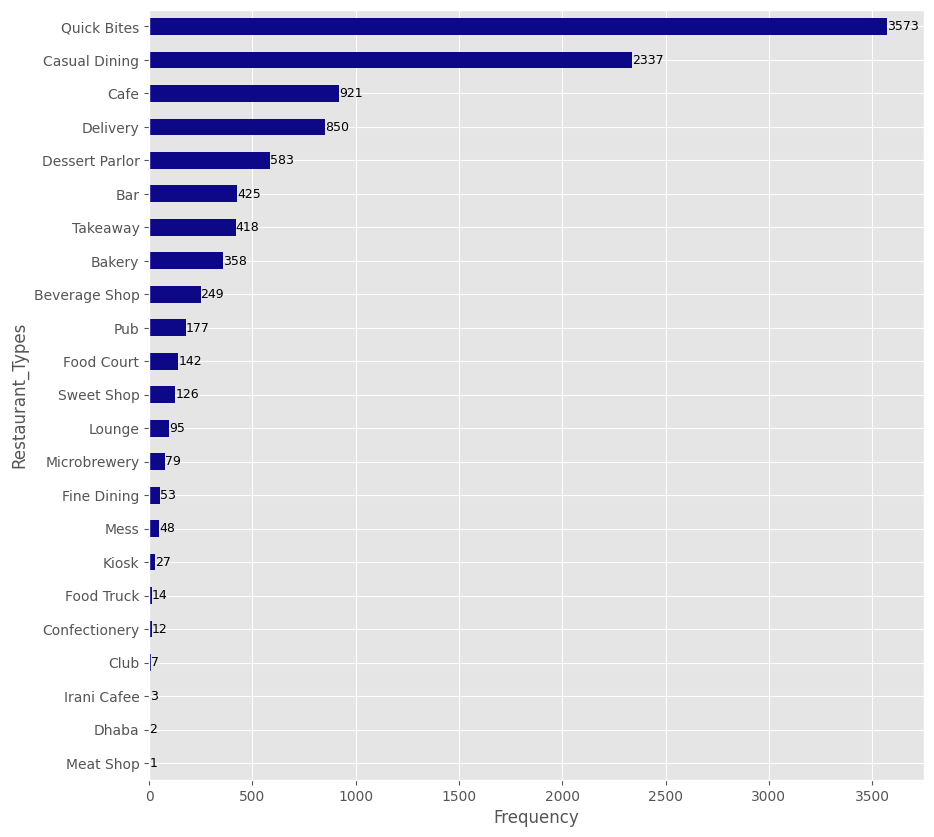

In [89]:
dfn['Rest_Type'].value_counts().sort_values().plot(kind='barh', figsize=(10,10), colormap='plasma')
for i, v in enumerate(dfn['Rest_Type'].value_counts()):
    plt.text(v, 22-i, str(v), va='center', fontsize=9, color='black')

plt.ylabel('Restaurant_Types')
plt.xlabel('Frequency')
plt.show()

#### Quick Bites dominate the city followed by Casual Dining and Cafes.

---

<a id="i" ></a>

<a id="k" ></a>

### 10. Is there any difference b/w the votes of restaurants accepting and not accepting online orders?

#### Yes there is huge difference

In [90]:
a = df[df['Online_Order'] == 'Yes']['Number_of_votes'].sum()
b = df[df['Online_Order'] == 'No']['Number_of_votes'].sum()
a-b

604760

---

<a id="j" ></a>

### 12. Find the Best budget Restaurants in any location. 

* ##### People's opinion on 'Best-Budget' will be different according to their income. Being a Metropolitan city, the prices of food in Bengaluru increase every year. And so do bills of customers ordering food from restaurants. Gathered from Internet, prices of less than ₹300 for 2 people is considered Pocket Friendly whereas price range of ₹300 to ₹600 for 2 is mid-range in Bengaluru. The Aspirers (₹12,500-₹50,000/- per annum) would consider Pocket-Friendly ones as Best budget and Middle-Class (₹50,000-₹3,00,000/- per annum) may consider Mid-Range restaurants as Best Budget for them.

* ##### To get an idea of best-budget pocket friendly restaurants, we have extracted the dataset which has 'Approx_Cost' less than or equal to 300 and made use of Ratings column to extract the best ones (Rating greater than 4 is assumed to be best). Remembering that we have 'NEW's and '–1's in Rating column, we have ignored those records, grouped the restaurants with 'mean' as aggregating function on 'Approx_Cost' to avoid chain restaurants appearing more than once in the plot. Code as follows:

In [91]:
df1 = df.copy()

In [92]:
df1 = df1.sort_values(by='Approx_Cost(for two people)')
df1

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
2249,12232,Srinidhi Sagar Food Line,Yes,No,3.7,129,Indiranagar,Quick Bites,"Vada, Masala Dosa, Filter Coffee","South Indian, North Indian, Chinese",40,Delivery,Church Street
3989,27091,Srinidhi Sagar Deluxe,Yes,No,3.6,108,Domlur,Quick Bites,"Idli, Coffee, Masala Dosa, Fruit Juices, Vada,...","South Indian, North Indian, Chinese",40,Delivery,Koramangala 4th Block
483,10649,Nellore Dosa Camp,No,No,3.3,5,BTM,Quick Bites,NaN,"Andhra, South Indian",70,Dine-out,BTM
6831,10544,Namaste,No,No,NEW,0,BTM,Quick Bites,NaN,South Indian,70,Dine-out,BTM
8948,20000,Lassi Shop,Yes,No,-1,0,JP Nagar,Dessert Parlor,NaN,"Ice Cream, Beverages",80,Delivery,Jayanagar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7570,6143,Kebabs & Kurries - ITC Gardenia,No,Yes,4.3,355,Richmond Road,Fine Dining,"Dal Bukhara, Biryani, Fish, Gulab Jamun, Kulfi...","North Indian, Mughlai",3500,Dine-out,Brigade Road
7910,43370,The Lantern Restaurant & Bar - The Ritz-Carlto...,No,Yes,4.3,430,Residency Road,"Fine Dining, Bar","Dumplings, Momos, Chenin Blanc, Mapo Tofu, Coc...",Chinese,3500,Dine-out,MG Road
8772,13331,Riwaz - The Ritz-Carlton,No,Yes,4.1,270,Residency Road,"Fine Dining, Bar","Tandoori Broccoli, Dal Makhani, Tamatar Ka Sho...",North Indian,4000,Pubs and bars,Church Street
736,37715,La Brasserie - Le Meridien,No,Yes,4.1,309,Sankey Road,Fine Dining,"Pasta, Veg Sushi, Biryani, Lunch Buffet, Waffl...","North Indian, Continental, Japanese, Chinese, ...",4100,Buffet,Lavelle Road


In [93]:
df['Approx_Cost(for two people)'].value_counts().sort_index().head(20)

Approx_Cost(for two people)
40        2
70        2
80        1
100     171
120       2
130       2
150     372
180       3
199       1
200     851
230       1
250     527
300    1328
350     302
400    1190
450     276
469       1
500     846
550     140
600     656
Name: count, dtype: int64

#### 1. Pocket-Friendly : Approximate Cost for 2 in the range (₹0,₹300)

In [94]:
df1[df1['Approx_Cost(for two people)'] <= 300]

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
2249,12232,Srinidhi Sagar Food Line,Yes,No,3.7,129,Indiranagar,Quick Bites,"Vada, Masala Dosa, Filter Coffee","South Indian, North Indian, Chinese",40,Delivery,Church Street
3989,27091,Srinidhi Sagar Deluxe,Yes,No,3.6,108,Domlur,Quick Bites,"Idli, Coffee, Masala Dosa, Fruit Juices, Vada,...","South Indian, North Indian, Chinese",40,Delivery,Koramangala 4th Block
483,10649,Nellore Dosa Camp,No,No,3.3,5,BTM,Quick Bites,NaN,"Andhra, South Indian",70,Dine-out,BTM
6831,10544,Namaste,No,No,NEW,0,BTM,Quick Bites,NaN,South Indian,70,Dine-out,BTM
8948,20000,Lassi Shop,Yes,No,-1,0,JP Nagar,Dessert Parlor,NaN,"Ice Cream, Beverages",80,Delivery,Jayanagar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,46362,Waffle Stories,Yes,No,3.9,360,Malleshwaram,Food Court,"Brownie Sundae, Nutella Waffle, Brownie Waffle...",Desserts,300,Delivery,Rajajinagar
1634,3087,Sugar Rush,No,No,3.8,39,Banashankari,Bakery,NaN,"Bakery, Desserts",300,Delivery,Basavanagudi
2823,47698,Kanchanjunga Kitchen - The Flavour of Hills,Yes,No,-1,0,Koramangala 8th Block,Quick Bites,NaN,"Chinese, Nepalese, Tibetan, Momos",300,Delivery,Residency Road
2329,49828,Tasty Yum,No,No,NEW,0,Sarjapur Road,Quick Bites,NaN,"South Indian, Mughlai",300,Dine-out,Sarjapur Road


#### The above restaurants are pocket friendly. We can make use of Ratings to further downsize the best ones. Let's look at the ones with Rating greater than 4

In [95]:
a1 = d1[(d1['Approx_Cost(for two people)'] <= 300) & (d1['Rating (out of 5)'].apply(lambda x: float(x) if x != 'NEW' else -1) >= 4)]
a1.head()

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
15,21345,Sri Guru Kottureshwara Davangere Benne Dosa,Yes,No,4.1,564,Basavanagudi,Quick Bites,"Benne Dosa, Mirchi Bajji, Filter Coffee, Poha,...",South Indian,150,Dine-out,Jayanagar
31,5234,Hotel Ramprasad,Yes,No,4.2,93,Brigade Road,Quick Bites,"Filter Coffee, Kesari Bath, Curd Rice, Idli Va...","South Indian, Chinese",300,Delivery,Brigade Road
45,10204,Sreeraj Lassi Bar,Yes,No,4.0,87,BTM,Beverage Shop,"Faluda, Fruit Salad, Fruit Lassi",Beverages,200,Desserts,BTM
58,43543,Kentacky Chicken Corner,No,No,4.0,107,Richmond Road,Quick Bites,"Chicken Curry, Biryani, Chilli Chicken, Fry Pr...","Andhra, South Indian",300,Dine-out,MG Road
115,13509,Notebook Food Court,Yes,No,4.0,220,Electronic City,Quick Bites,NaN,"Chinese, North Indian, Rolls",300,Delivery,Electronic City


In [96]:
a1['Rating (out of 5)'] = a1['Rating (out of 5)'].astype('float64')

In [97]:
a1[a1['Name'] == '99 Pancakes']

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
4732,19558,99 Pancakes,Yes,No,4.5,339,Koramangala 5th Block,"Dessert Parlor, Cafe","Pan Cake, Waffles, Nutella Pancakes","Desserts, Cafe",300,Delivery,Jayanagar
8664,47571,99 Pancakes,Yes,No,4.1,48,Church Street,Dessert Parlor,Nutella Pancakes,"Desserts, Ice Cream",300,Delivery,Residency Road
8760,36437,99 Pancakes,Yes,No,4.5,349,Koramangala 5th Block,"Dessert Parlor, Cafe","Pan Cake, Waffles, Nutella Pancakes","Desserts, Beverages, Cafe, Ice Cream",300,Desserts,Koramangala 7th Block


#### There are chain restaurants so I have grouped them with aggregating function 'mean'.

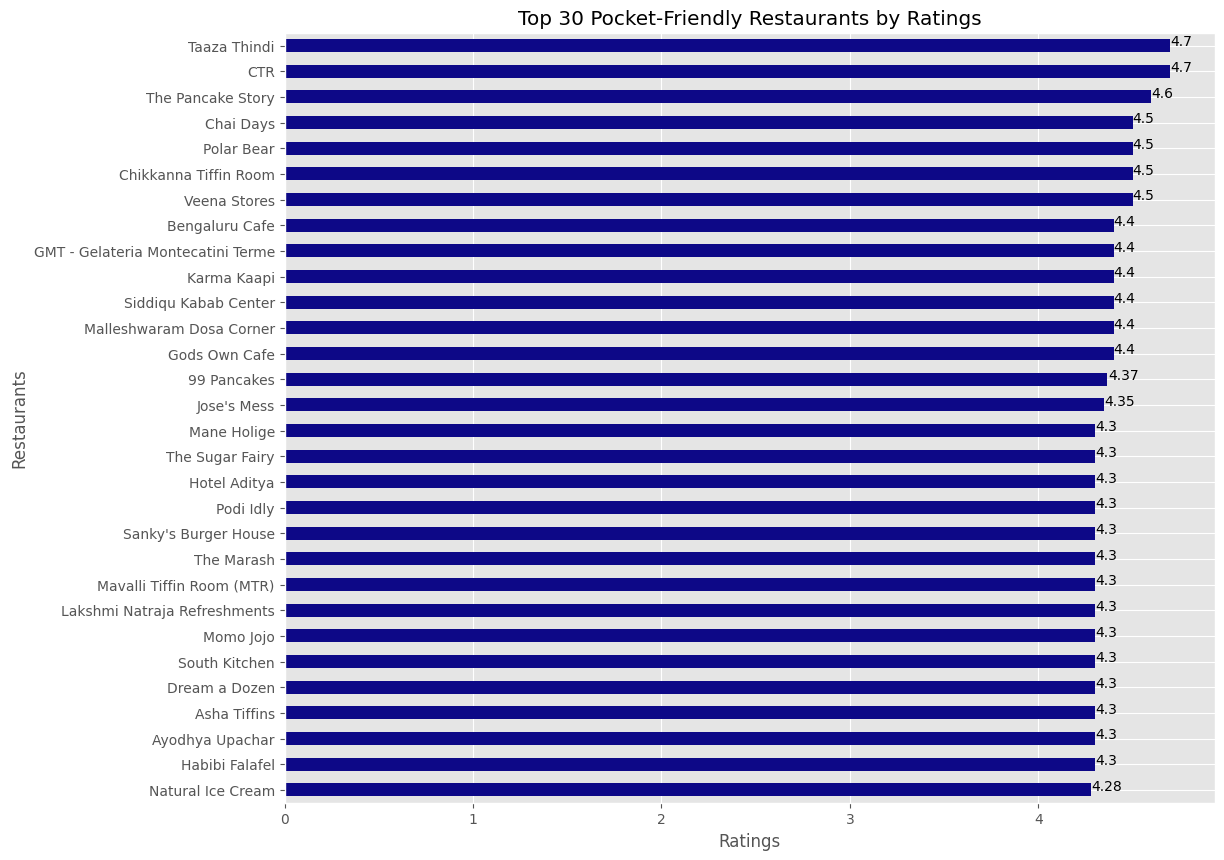

In [98]:
a1.groupby('Name')['Rating (out of 5)'].agg('mean').sort_values(ascending=False).head(30).sort_values().plot(kind='barh', 
title='Top 30 Pocket-Friendly Restaurants by Ratings', figsize=(12,10), colormap='plasma')

for i,v in enumerate(a1.groupby('Name')['Rating (out of 5)'].agg('mean').sort_values(ascending=False).head(30)):
    plt.text(round(v,2), 29-i, str(round(v,2)))

plt.ylabel('Restaurants')
plt.xlabel('Ratings')
plt.show()

##### Taaza Thindi and CTR dominate the chart followed by The Pancake Story and others.

#### 2. Mid-range Restaurants : Approximate Cost for 2 people in range (₹300,₹600)

In [99]:
df1[(df1['Approx_Cost(for two people)'] > 300) & (df1['Approx_Cost(for two people)'] <= 600)]

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
4839,30986,Baker's Treat,No,No,-1,0,Koramangala 7th Block,"Bakery, Dessert Parlor",NaN,"Bakery, Desserts",350,Desserts,Koramangala 5th Block
4170,27921,Martino's,No,No,3.6,30,Koramangala 1st Block,Quick Bites,NaN,"Italian, Pizza",350,Delivery,Koramangala 4th Block
6395,5614,R.K Caterers,Yes,No,-1,0,Frazer Town,Quick Bites,NaN,North Indian,350,Delivery,Brigade Road
7292,17460,Hotel Thazooq,No,No,3.3,6,Koramangala 1st Block,Quick Bites,NaN,"North Indian, Chinese, Biryani",350,Dine-out,HSR
846,1174,New Karawali Lunch Home,Yes,No,3.5,20,Bannerghatta Road,Quick Bites,NaN,Mangalorean,350,Delivery,Bannerghatta Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,9908,Chination,Yes,No,3.5,4,Koramangala 4th Block,Delivery,NaN,Chinese,600,Delivery,BTM
7966,28295,TGS Retails,No,No,3.3,4,HSR,"Takeaway, Delivery",NaN,"Bakery, Desserts",600,Desserts,Koramangala 4th Block
529,35601,Mad Over Biryani,Yes,No,3.1,9,Koramangala 6th Block,Quick Bites,NaN,"North Indian, Biryani",600,Delivery,Koramangala 7th Block
6290,23163,Checkpost,Yes,No,4.1,956,JP Nagar,Casual Dining,"Filter Kaapi, Coffee, Egg Curry, Neer Dosa, Ka...","South Indian, Seafood, North Indian, Beverages",600,Dine-out,JP Nagar


#### Similar to above case let's group by ratings of greater than 4 to downsize further.

In [100]:
a2 = df1[(df1['Approx_Cost(for two people)'] > 300) & (df1['Approx_Cost(for two people)'] <= 600) & (d1['Rating (out of 5)'].apply(lambda x: float(x) if x != 'NEW' else -1) >= 4)]
a2.head()

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
4203,44010,Deccan House,Yes,No,4.0,409,New BEL Road,Quick Bites,"Hyderabadi Biryani, Chicken Biryani, Vegetable...","Hyderabadi, Biryani",350,Delivery,New BEL Road
7374,31142,Haji Ali Juice Centre,Yes,No,4.0,152,Koramangala 5th Block,"Beverage Shop, Quick Bites","Faluda, Sandwiches, Paneer Tikka Pizza, Cream ...","Beverages, Fast Food, Desserts",350,Dine-out,Koramangala 5th Block
7277,14616,Happy Belly Bakes,Yes,No,4.1,252,Frazer Town,"Bakery, Cafe","Hot Chocolate, Brownie, Chocolate Truffle, App...","Bakery, Cafe",350,Cafes,Frazer Town
4891,24082,Paratha Singh,Yes,No,4.0,297,Kalyan Nagar,Quick Bites,"Chaat, Pav Bhaji, Buttermilk, Ajwaini Paratha,...",North Indian,350,Delivery,Kalyan Nagar
3546,30536,The ThickShake Factory,No,No,4.3,236,Koramangala 7th Block,Beverage Shop,"Thick Shakes, Belgium Chocolate, Triple Choco ...","Beverages, Juices",350,Delivery,Koramangala 5th Block


In [101]:
a2['Rating (out of 5)'] = a2['Rating (out of 5)'].astype('float64')

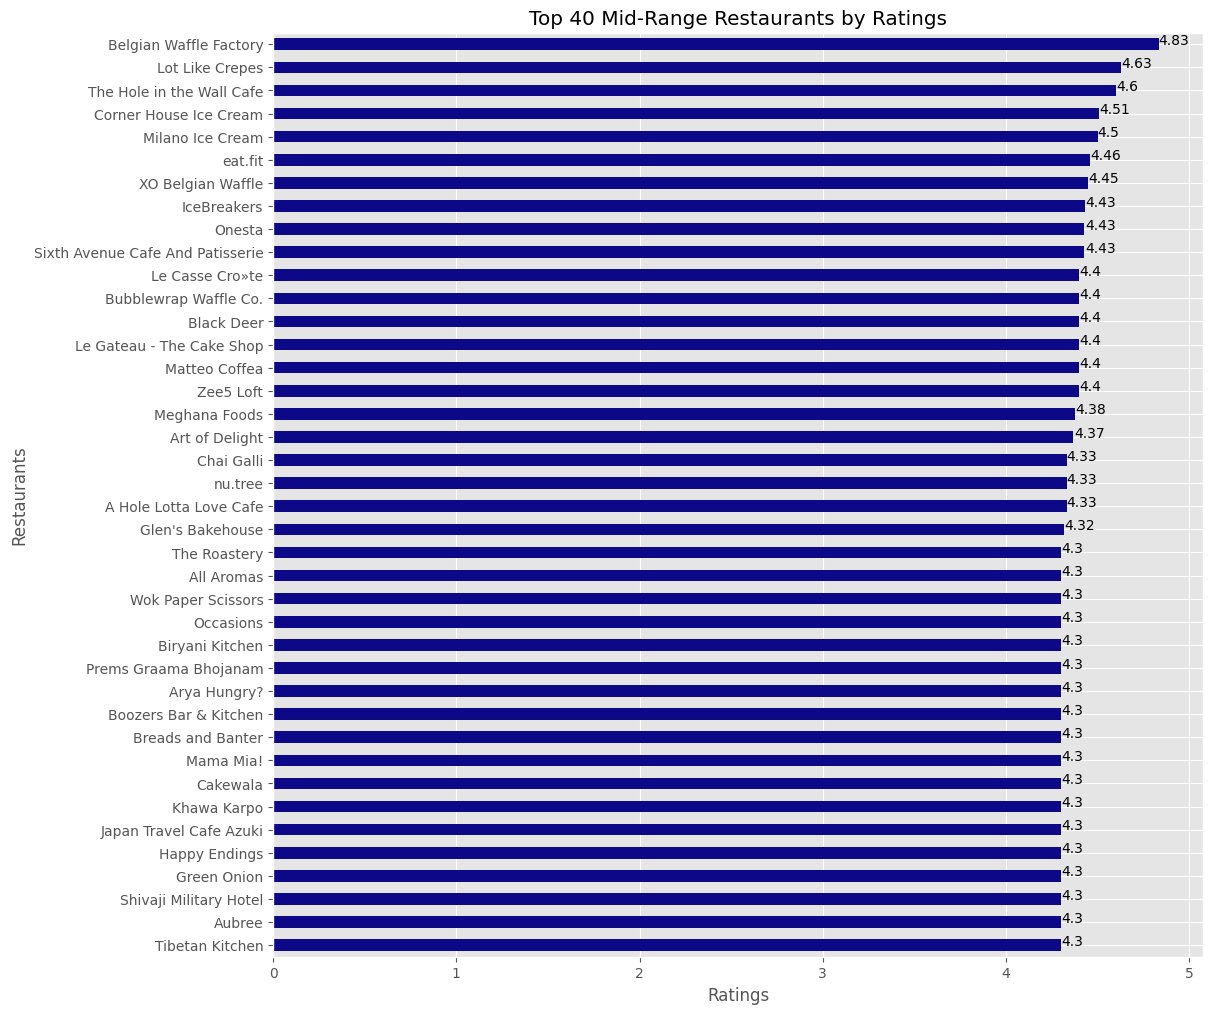

In [102]:
a2.groupby('Name')['Rating (out of 5)'].agg('mean').sort_values(ascending=False).head(40).sort_values().plot(kind='barh', 
title='Top 40 Mid-Range Restaurants by Ratings', figsize=(12,12), colormap='plasma')

for i,v in enumerate(a2.groupby('Name')['Rating (out of 5)'].agg('mean').sort_values(ascending=False).head(40)):
    plt.text(round(v,2), 39-i, str(round(v,2)))

plt.ylabel('Restaurants')
plt.xlabel('Ratings')
plt.show()

##### Belgian Waffle Factory dominates the chart followed by Lot like Crepe and others.

---

<a id="l" ></a>

### 13. Top quick bites restaurant chains in Bengaluru.

#### Because the question didn't explicitly mention on what basis we should assume the popularity of a restaurant, we have plotted 2 graphs. One is based on Frequency i.e., the restaurants which have more number of chains in city and second plot based on Rating popularity i.e., the restaurants which are best in terms of ratings.

#### a) Based on Frequency

In [103]:
Quick_Bites_df = df[df['Rest_Type'].str.contains('Quick Bites',na=False)]
Quick_Bites_df.head()

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
3,51635,Thai & Chinese Fast Food,No,No,3.4,7,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,Dine-out,Whitefield
4,23424,Grill On Wheels,No,No,NEW,0,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,Dine-out,JP Nagar
7,35354,Bombay Talkies,Yes,No,3.6,24,Jayanagar,Quick Bites,NaN,"Maharashtrian, Fast Food, Street Food, Sandwich",200,Delivery,Koramangala 7th Block
8,29058,Cafe 58,No,No,3.4,4,BTM,Quick Bites,NaN,"Fast Food, Biryani",200,Dine-out,Koramangala 4th Block
9,32593,Shagun Sweets & Foods,Yes,No,3.5,221,BTM,"Sweet Shop, Quick Bites","Chaat, Chole Bhature, Raj Kachori, Thali, Rasm...","Mithai, North Indian, Street Food, Chinese",400,Delivery,Koramangala 6th Block


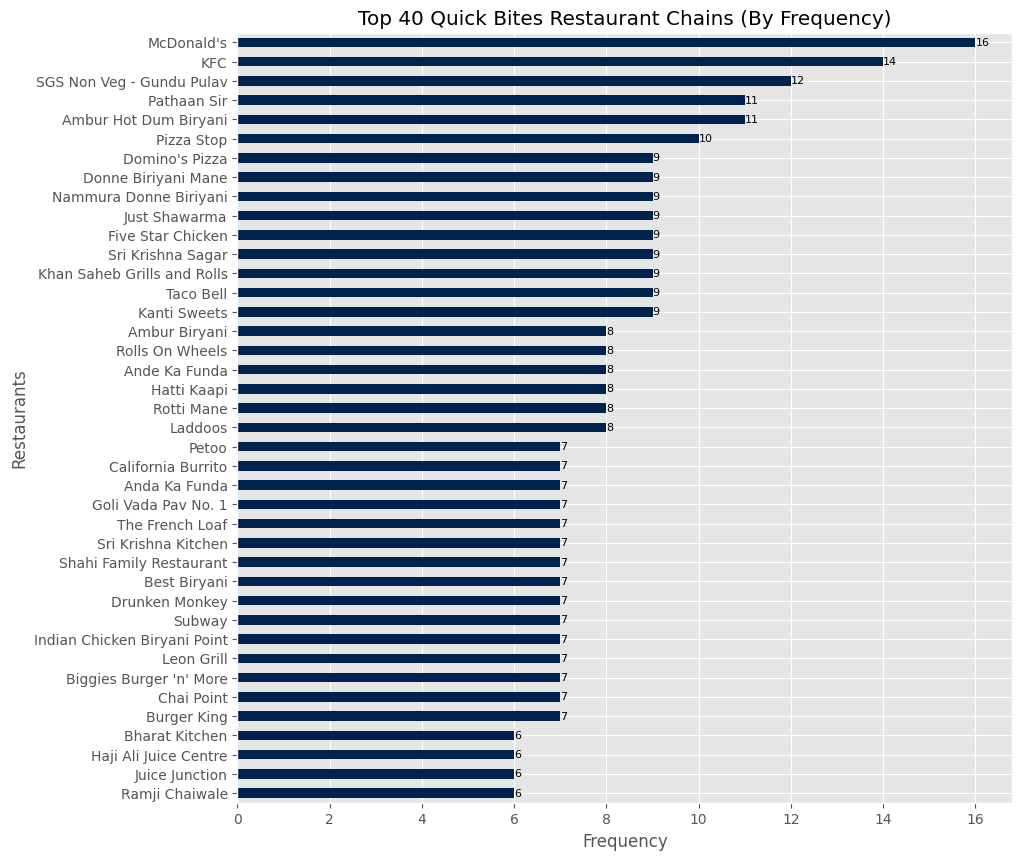

In [104]:
Quick_Bites_df['Name'].value_counts().head(40).sort_values().plot(kind='barh', figsize=(10,10), title='Top 40 Quick Bites Restaurant Chains (By Frequency)', colormap='cividis')
for i,v in enumerate(Quick_Bites_df['Name'].value_counts().head(40)):
    plt.text(v, 39-i, str(v), va='center', fontsize=8, color='black')

plt.xlabel('Frequency')
plt.ylabel('Restaurants')
plt.show()

##### American MNC Fast Food chains McDonalds and KFC dominate the chart. They have more number of Quick Bite chains in city.

#### b) Based on Rating Popularity (Ignoring the Nulls and 'NEW')

In [105]:
b = Quick_Bites_df[Quick_Bites_df['Rating (out of 5)'].apply(lambda x: float(x) if x != 'NEW' else -1) >= 4]
b.head()

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
15,21345,Sri Guru Kottureshwara Davangere Benne Dosa,Yes,No,4.1,564,Basavanagudi,Quick Bites,"Benne Dosa, Mirchi Bajji, Filter Coffee, Poha,...",South Indian,150,Dine-out,Jayanagar
31,5234,Hotel Ramprasad,Yes,No,4.2,93,Brigade Road,Quick Bites,"Filter Coffee, Kesari Bath, Curd Rice, Idli Va...","South Indian, Chinese",300,Delivery,Brigade Road
58,43543,Kentacky Chicken Corner,No,No,4.0,107,Richmond Road,Quick Bites,"Chicken Curry, Biryani, Chilli Chicken, Fry Pr...","Andhra, South Indian",300,Dine-out,MG Road
99,11057,Tibetan Kitchen,Yes,No,4.3,245,Koramangala 5th Block,Quick Bites,"Noodles, Pasta, Tibetan Momos, Clear Soup, Chi...","Tibetan, Chinese, Continental, Momos",600,Dine-out,BTM
115,13509,Notebook Food Court,Yes,No,4.0,220,Electronic City,Quick Bites,NaN,"Chinese, North Indian, Rolls",300,Delivery,Electronic City


In [106]:
b['Rating (out of 5)'] = b['Rating (out of 5)'].astype('float64')

#### Since we are considering ratings, I have taken care of fact that chain restaurants may occur multiple times in chart. Example as follows:

In [107]:
# A franchise restaurant may have multiple ratings across all it's chains in the city
b[b['Name'] == 'Taco Bell']

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
1331,41272,Taco Bell,Yes,No,4.0,784,Brookefield,Quick Bites,"Tacos, Nachos, Burrito, Rice Bowl, Pizza, Fies...","Mexican, American, Fast Food",600,Delivery,Marathahalli
1676,14699,Taco Bell,Yes,No,4.1,389,Indiranagar,Quick Bites,"Tacos, Nachos, Tikka Masala Burrito, Chicken Q...","Mexican, American, Fast Food",600,Delivery,Frazer Town
1715,8444,Taco Bell,Yes,No,4.1,1959,Koramangala 6th Block,Quick Bites,"Tacos, Nachos, Potato Pops, Potato Burrito, Fi...","Mexican, American, Fast Food",600,Delivery,BTM
2253,23522,Taco Bell,Yes,No,4.0,911,Bannerghatta Road,Quick Bites,"Nachos, Tacos, Mexican Pizza, Cheesy Fiesta Po...","Mexican, American, Fast Food",600,Dine-out,JP Nagar
4646,18863,Taco Bell,Yes,No,4.2,387,Indiranagar,Quick Bites,"Tacos, Nachos, Tikka Masala Burrito, Chicken Q...","Mexican, American, Fast Food",600,Dine-out,Indiranagar
5811,11131,Taco Bell,Yes,No,4.0,911,Bannerghatta Road,Quick Bites,"Nachos, Tacos, Mexican Pizza, Cheesy Fiesta Po...","Mexican, American, Fast Food",600,Dine-out,BTM
7650,32321,Taco Bell,Yes,No,4.1,1963,Koramangala 6th Block,Quick Bites,"Tacos, Nachos, Potato Pops, Potato Burrito, Fi...","Mexican, American, Fast Food",600,Delivery,Koramangala 6th Block


#### To avoid this, grouping the chain restaurants.

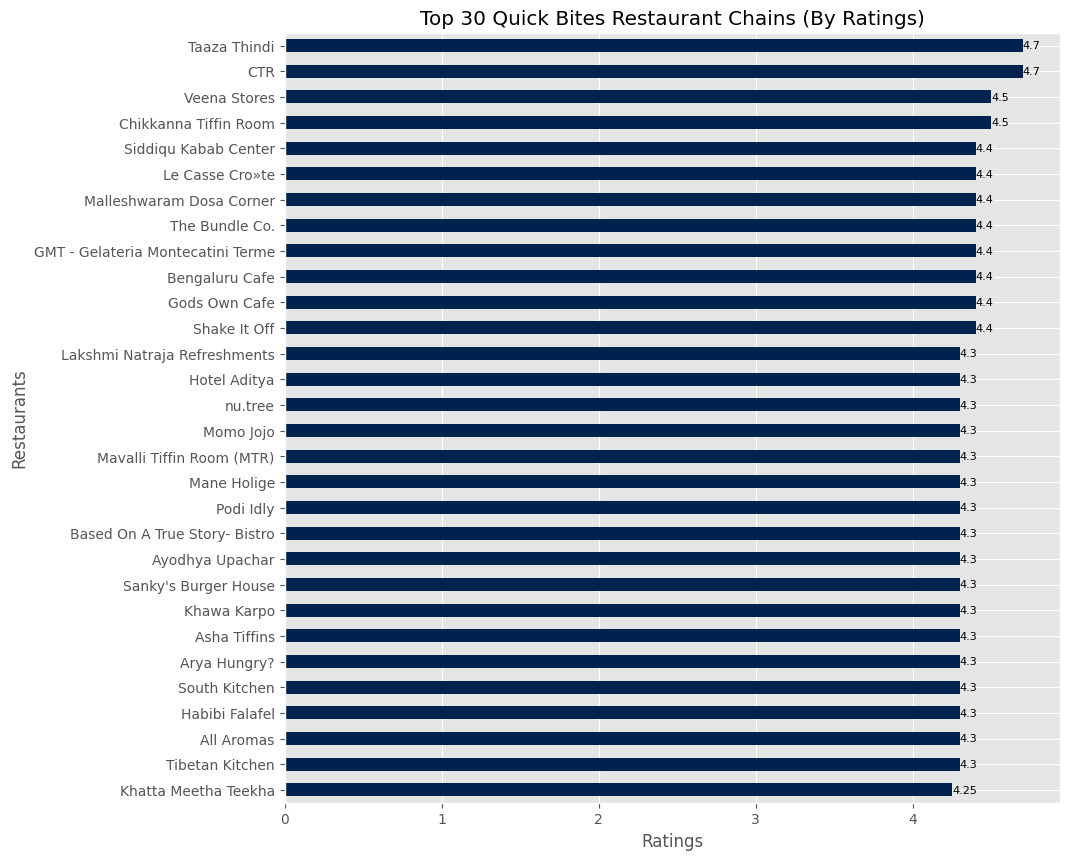

In [108]:
b.groupby('Name')['Rating (out of 5)'].agg('mean').sort_values(ascending=False).head(30).sort_values().plot(kind='barh', figsize=(10,10), 
title='Top 30 Quick Bites Restaurant Chains (By Ratings)', colormap='cividis')
for i,v in enumerate(b.groupby('Name')['Rating (out of 5)'].agg('mean').sort_values(ascending=False).head(30)):
    plt.text(v, 29-i, str(v), va='center', fontsize=8, color='black')

plt.xlabel('Ratings')
plt.ylabel('Restaurants')
plt.show()

#### Taaza Thindi and CTR dominate this chart as well. Remember that these 2 were at top in pocket friendly restaurants as well. Remember to visit any of these two when in Bengaluru :)

---

<a id="p" ></a>

### 14. Which are the most popular casual dining restaurant chains, Make use of any plot related to this question?

#### a) By Frequency

In [109]:
Casual_Dining_df = df[df['Rest_Type'].str.contains('Casual Dining',na=False)]
Casual_Dining_df.head()

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
0,14221,Shree Ranga Vilas,No,No,3.2,7,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,Dine-out,Electronic City
10,40460,High Ultra Lounge,No,Yes,4.1,4768,Malleshwaram,"Lounge, Casual Dining","Cocktails, Salmon Sushi, Jumbo Prawns, Chocola...","Japanese, Thai, Chinese, Korean",2600,Drinks & nightlife,Malleshwaram
12,25635,Ocean's Delight,No,No,3.4,13,Kammanahalli,Casual Dining,NaN,"Seafood, Biryani, South Indian",700,Delivery,Kammanahalli
16,50081,The Fisherman's Wharf,Yes,Yes,4.3,4139,Sarjapur Road,"Casual Dining, Bar","Sea Food, Caesar Salad, Jumbo Prawns, Cocktail...","Seafood, Goan, North Indian, Continental, Asian",1400,Pubs and bars,Sarjapur Road
17,27394,Once Upon A Flame,Yes,No,4.5,2071,HSR,Casual Dining,"Burgers, Pasta, Mocktails, Mashed Potato, Sala...","Steak, Continental, Burger, BBQ",1200,Delivery,Koramangala 4th Block


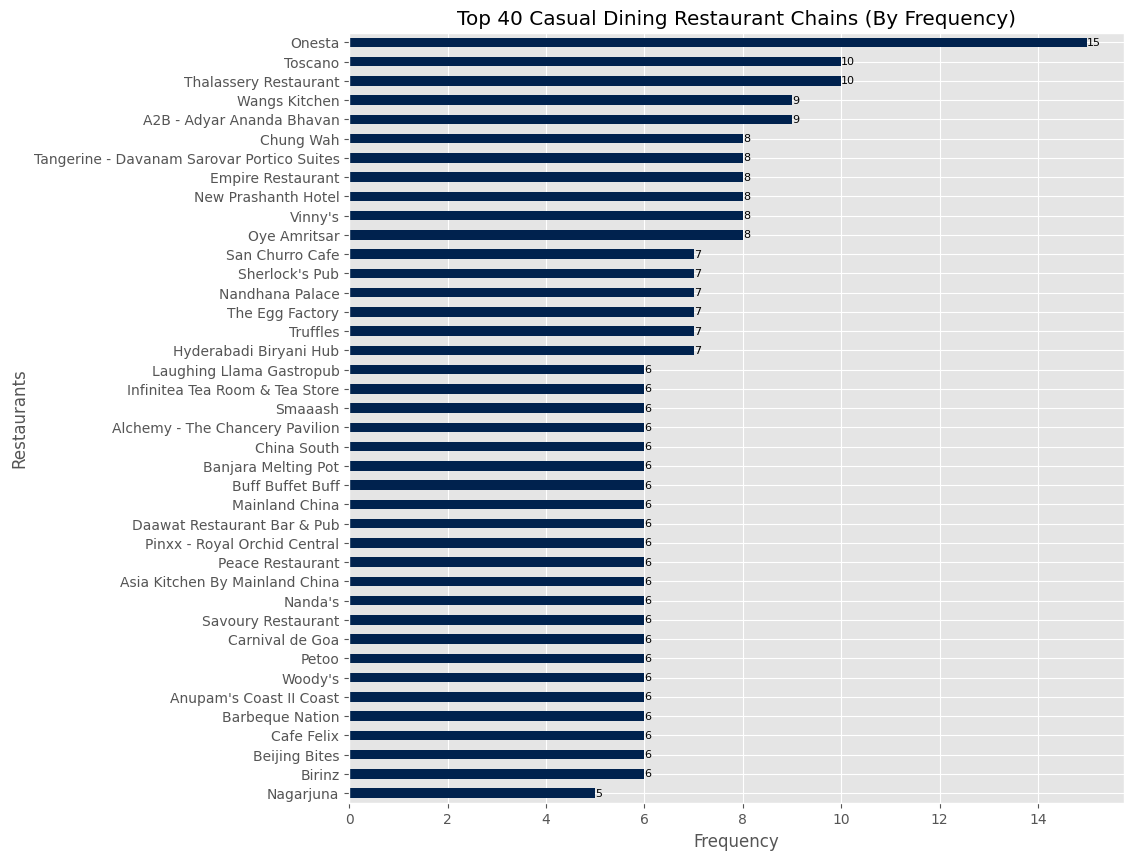

In [110]:
Casual_Dining_df['Name'].value_counts().head(40).sort_values().plot(kind='barh', figsize=(10,10), 
title='Top 40 Casual Dining Restaurant Chains (By Frequency)', colormap='cividis')
for i,v in enumerate(Casual_Dining_df['Name'].value_counts().head(40)):
    plt.text(v, 39-i, str(v), va='center', fontsize=8, color='black')

plt.xlabel('Frequency')
plt.ylabel('Restaurants')
plt.show()

#### b) By Ratings (Ignoring 'NEW' and Nulls)

In [111]:
c = Casual_Dining_df[Casual_Dining_df['Rating (out of 5)'].apply(lambda x: float(x) if x != 'NEW' else -1) >= 4]
c.head()

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
10,40460,High Ultra Lounge,No,Yes,4.1,4768,Malleshwaram,"Lounge, Casual Dining","Cocktails, Salmon Sushi, Jumbo Prawns, Chocola...","Japanese, Thai, Chinese, Korean",2600,Drinks & nightlife,Malleshwaram
16,50081,The Fisherman's Wharf,Yes,Yes,4.3,4139,Sarjapur Road,"Casual Dining, Bar","Sea Food, Caesar Salad, Jumbo Prawns, Cocktail...","Seafood, Goan, North Indian, Continental, Asian",1400,Pubs and bars,Sarjapur Road
17,27394,Once Upon A Flame,Yes,No,4.5,2071,HSR,Casual Dining,"Burgers, Pasta, Mocktails, Mashed Potato, Sala...","Steak, Continental, Burger, BBQ",1200,Delivery,Koramangala 4th Block
18,2632,Andhra Ruchulu,Yes,Yes,4.2,1428,JP Nagar,Casual Dining,"Paneer Tikka, Bhuna Gosht, Andhra Meal, Chicke...","Andhra, North Indian",800,Delivery,Basavanagudi
27,36606,Kebarbiq,No,No,4.0,138,Koramangala 7th Block,Casual Dining,"Burgers, Pulpy Grape Juice, Chicken Wings, Pit...","North Indian, Arabian, Mughlai, Middle Eastern...",800,Dine-out,Koramangala 7th Block


In [112]:
c['Rating (out of 5)'] = c['Rating (out of 5)'].astype('float64')

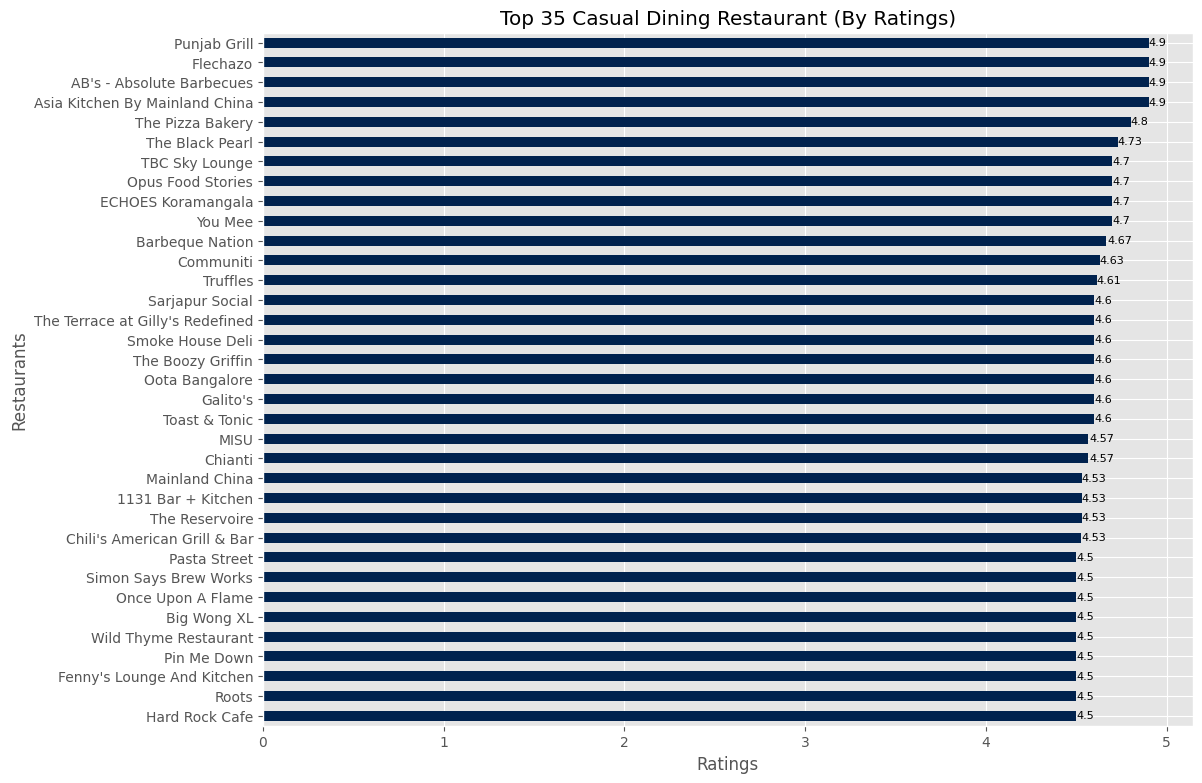

In [113]:
c.groupby('Name')['Rating (out of 5)'].agg('mean').sort_values(ascending=False).head(35).sort_values().plot(kind='barh', 
title='Top 35 Casual Dining Restaurant (By Ratings)', colormap='cividis', figsize=(12,9))

for i,v in enumerate(c.groupby('Name')['Rating (out of 5)'].agg('mean').sort_values(ascending=False).head(35)):
    plt.text(round(v,2), 34-i, str(round(v,2)), va='center', fontsize=8, color='black')

plt.xlabel('Ratings')
plt.ylabel('Restaurants')
plt.show()

In [114]:
c[c['Name'] == 'Punjab Grill']

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
2620,46960,Punjab Grill,Yes,Yes,4.9,1985,Malleshwaram,Casual Dining,"Chicken Malai Tikka, Jalebi Rabri, Lunch Buffe...","North Indian, Mughlai",2000,Dine-out,Rajajinagar
4237,40095,Punjab Grill,Yes,Yes,4.9,1940,Malleshwaram,Casual Dining,"Chicken Malai Tikka, Jalebi Rabri, Paneer Tikk...","North Indian, Mughlai",2000,Dine-out,Malleshwaram
6401,39559,Punjab Grill,Yes,Yes,4.9,1940,Malleshwaram,Casual Dining,"Chicken Malai Tikka, Jalebi Rabri, Paneer Tikk...","North Indian, Mughlai",2000,Delivery,Malleshwaram


<a id="n" ></a>

In [115]:
c[c['Name'] == 'Flechazo']

,ID,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),listed_in(type),listed_in(city)
2606,51042,Flechazo,No,Yes,4.9,3004,Whitefield,Casual Dining,"Pizza, Mutton Kebab, Chicken Biryani, Sea Food...","Asian, Mediterranean, North Indian, BBQ",1400,Dine-out,Whitefield
5812,6746,Flechazo,No,Yes,4.9,2745,Whitefield,Casual Dining,"Pizza, Mutton Kebab, Chicken Biryani, Sea Food...","Asian, Mediterranean, North Indian, BBQ",1400,Buffet,Brookefield


#### We can observe that some of them are not individual restaurants but chain restaurants. Let's try to extract these and plot for Top Rated Casula Dining Chains in Bengaluru.

In [116]:
top_rated_dict = c.groupby('Name')['Rating (out of 5)'].agg('mean').sort_values(ascending=False).head(35).to_dict()
top_rated_dict

{'Punjab Grill': 4.9,
 'Flechazo': 4.9,
 "AB's - Absolute Barbecues": 4.9,
 'Asia Kitchen By Mainland China': 4.9,
 'The Pizza Bakery': 4.8,
 'The Black Pearl': 4.733333333333333,
 'You Mee': 4.7,
 'ECHOES Koramangala': 4.7,
 'TBC Sky Lounge': 4.7,
 'Opus Food Stories': 4.7,
 'Barbeque Nation': 4.666666666666667,
 'Communiti': 4.633333333333333,
 'Truffles': 4.614285714285714,
 "The Terrace at Gilly's Redefined": 4.6,
 'Smoke House Deli': 4.6,
 'The Boozy Griffin': 4.6,
 'Sarjapur Social': 4.6,
 'Oota Bangalore': 4.6,
 'Toast & Tonic': 4.6,
 "Galito's": 4.6,
 'MISU': 4.566666666666666,
 'Chianti': 4.566666666666666,
 'Mainland China': 4.533333333333333,
 '1131 Bar + Kitchen': 4.533333333333333,
 'The Reservoire': 4.533333333333333,
 "Chili's American Grill & Bar": 4.525,
 'Roots': 4.5,
 "Fenny's Lounge And Kitchen": 4.5,
 'Pin Me Down': 4.5,
 'Pasta Street': 4.5,
 'Big Wong XL': 4.5,
 'Once Upon A Flame': 4.5,
 'Simon Says Brew Works': 4.5,
 'Wild Thyme Restaurant': 4.5,
 'Hard Rock Ca

In [117]:
franchise_rest = []
top_rated_franchise_dict = {}

for i in top_rated_dict.keys():
    if c[c['Name'] == i].shape[0] > 1:
        franchise_rest.append(i)

for i in franchise_rest:
    top_rated_franchise_dict[i] = top_rated_dict[i]

top_rated_franchise_dict

{'Punjab Grill': 4.9,
 'Flechazo': 4.9,
 "AB's - Absolute Barbecues": 4.9,
 'Asia Kitchen By Mainland China': 4.9,
 'The Pizza Bakery': 4.8,
 'The Black Pearl': 4.733333333333333,
 'ECHOES Koramangala': 4.7,
 'Barbeque Nation': 4.666666666666667,
 'Communiti': 4.633333333333333,
 'Truffles': 4.614285714285714,
 'Smoke House Deli': 4.6,
 "Galito's": 4.6,
 'MISU': 4.566666666666666,
 'Chianti': 4.566666666666666,
 'Mainland China': 4.533333333333333,
 '1131 Bar + Kitchen': 4.533333333333333,
 'The Reservoire': 4.533333333333333,
 "Chili's American Grill & Bar": 4.525,
 'Roots': 4.5,
 "Fenny's Lounge And Kitchen": 4.5,
 'Pasta Street': 4.5,
 'Big Wong XL': 4.5,
 'Simon Says Brew Works': 4.5,
 'Wild Thyme Restaurant': 4.5,
 'Hard Rock Cafe': 4.5}

In [118]:
sorted_top_rated = dict(sorted(top_rated_franchise_dict.items(), key=lambda x : x[1]))

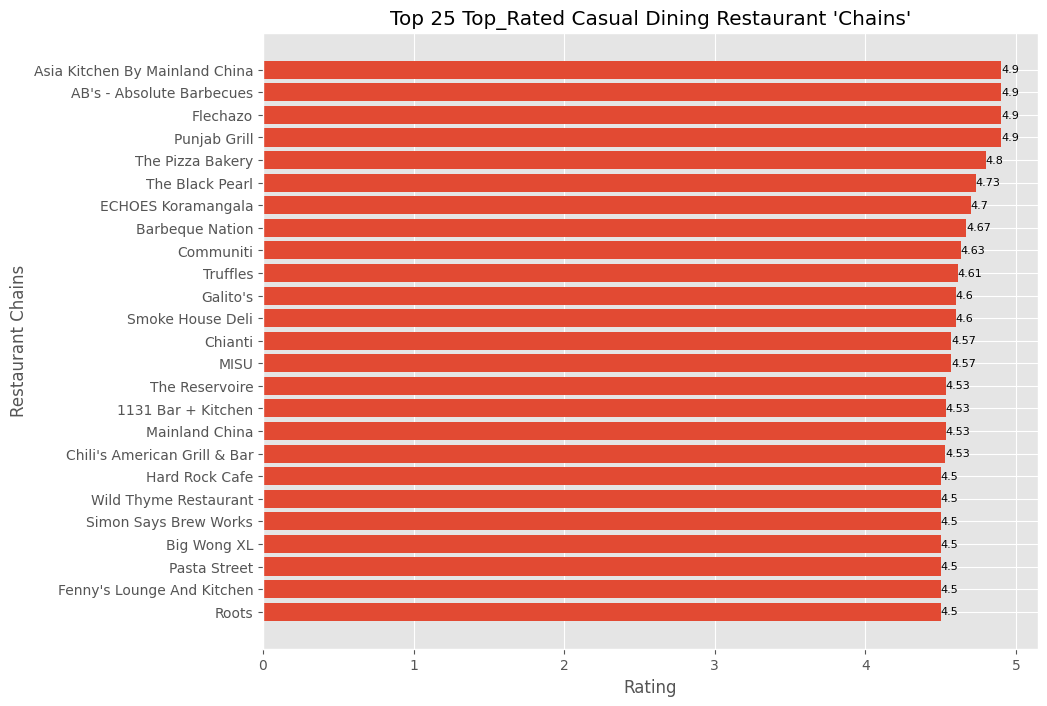

In [119]:
plt.figure(figsize=(10,8))
plt.barh(list(sorted_top_rated.keys()), list(sorted_top_rated.values()))
for i,j in enumerate(sorted_top_rated.values()):
    plt.text(round(j,2), i, str(round(j,2)), va='center', fontsize=8)

plt.title("Top 25 Top_Rated Casual Dining Restaurant 'Chains'")
plt.xlabel('Rating')
plt.ylabel('Restaurant Chains')
plt.show()

---

<a id="o" ></a>

### 15. Which are the most popular cuisines of Bangalore using a related plot?

In [120]:
df['Cuisines'].value_counts().head(40)

Cuisines
North Indian                           474
North Indian, Chinese                  407
South Indian                           325
Bakery, Desserts                       225
Biryani                                146
South Indian, North Indian, Chinese    132
Desserts                               119
Cafe                                   116
Fast Food                              114
Bakery                                 105
Chinese                                105
Ice Cream, Desserts                     98
Chinese, North Indian                   72
Mithai, Street Food                     70
North Indian, Chinese, Biryani          63
North Indian, South Indian              61
Desserts, Ice Cream                     58
South Indian, North Indian              58
Beverages                               56
Biryani, Kebab                          53
South Indian, Chinese                   53
Biryani, North Indian                   53
North Indian, South Indian, Chinese     51
De

In [121]:
Cuisines_List = ['North Indian','South Indian','Chinese','Biryani','Desserts','Cafe','Fast Food','Bakery','Street Food','Beverages','Andhra','Pizza','Continental']
Cuisines_Frequency_Dict = {}

In [122]:
for i in Cuisines_List:
    Cuisines_Frequency_Dict[i] = df[df['Cuisines'].str.contains(i)].shape[0]

print(Cuisines_Frequency_Dict)

{'North Indian': 3703, 'South Indian': 1506, 'Chinese': 2793, 'Biryani': 1152, 'Desserts': 1034, 'Cafe': 956, 'Fast Food': 1410, 'Bakery': 533, 'Street Food': 449, 'Beverages': 843, 'Andhra': 301, 'Pizza': 355, 'Continental': 1016}


In [123]:
sorted_Dict = dict(sorted(Cuisines_Frequency_Dict.items(), key= lambda x: x[1], reverse=False))

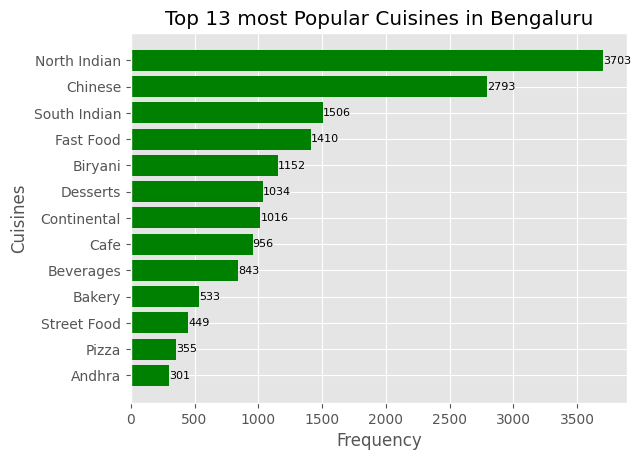

In [124]:
plt.barh(list(sorted_Dict.keys()), list(sorted_Dict.values()), color='g')
for i, v in enumerate(sorted_Dict.values()):
    plt.text(v, i, str(v), va='center', fontsize=8, color='black')
plt.title('Top 13 most Popular Cuisines in Bengaluru')

plt.xlabel('Frequency')
plt.ylabel('Cuisines')
plt.show()

#### Observe the surprising fact that North Indian cuisine is most popular in Bengaluru. Even more surprising is the fact that South Indian is not even in second place. This tells a lot about evolving culinary preferences and the significant migration of people from North India to the region.  

<a id="o" ></a>

## THE END